In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import matplotlib.pylab as plt

import tensorflow as tf

import tensorflow_hub as hub
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import json

AUTOTUNE = tf.data.experimental.AUTOTUNE

tf.__version__

'2.0.0'

In [ ]:
#!gsutil -m cp -r dir gs://erwinh-public-data/HotdogData/train ./

In [ ]:
#!gsutil -m cp -r dir gs://erwinh-public-data/HotdogData/eval ./

In [4]:
train_dir = os.path.join('train')
validation_dir = os.path.join('eval')

print(train_dir)

train_hotdog_dir = os.path.join(train_dir, 'hot_dog')  # directory with our training cat pictures
train_not_hot_dog_dir = os.path.join(train_dir, 'not_hot_dog')  # directory with our training dog pictures
validation_hotdog_dir = os.path.join(validation_dir, 'hot_dog')  # directory with our validation cat pictures
validation_not_hot_dog_dir = os.path.join(validation_dir, 'not_hot_dog')  # directory with our validation dog pictures

print(train_hotdog_dir)
print(validation_hotdog_dir)

train
train/hot_dog
eval/hot_dog


In [5]:
num_hotdog_tr = len(os.listdir(train_hotdog_dir))
num_not_hot_dog_tr = len(os.listdir(train_not_hot_dog_dir))

num_hotdog_val = len(os.listdir(validation_hotdog_dir))
num_not_hot_dog_val = len(os.listdir(validation_not_hot_dog_dir))

total_train = num_hotdog_tr + num_hotdog_val
total_val = num_not_hot_dog_tr + num_not_hot_dog_val

print('total training hotdog images:', num_hotdog_tr)
print('total training not_hotdog images:', num_not_hot_dog_tr)

print('total validation hotdog images:', num_hotdog_val)
print('total validation not_hotdog images:', num_not_hot_dog_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training hotdog images: 323
total training not_hotdog images: 350
total validation hotdog images: 151
total validation not_hotdog images: 152
--
Total training images: 474
Total validation images: 502


In [6]:
batch_size = 32
epochs = 4
IMG_HEIGHT = 224
IMG_WIDTH = 224
IMAGE_SHAPE = (224, 224)

train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 673 images belonging to 2 classes.
Found 303 images belonging to 2 classes.


In [7]:
feature_extractor_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/2" #@param {type:"string"}

feature_extractor_layer = hub.KerasLayer(feature_extractor_url,
                                         input_shape=(224,224,3))

feature_extractor_layer.trainable = False

In [8]:
model = tf.keras.Sequential([
  feature_extractor_layer,
  layers.Dense(2, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 2)                 2562      
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [9]:
steps_epoch = total_train // batch_size
val_steps = total_val // batch_size

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['acc']
              )

In [10]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=steps_epoch,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=val_steps)

Epoch 1/4
14/14 [==============================] - 62s 4s/step - loss: 0.4658 - acc: 0.7969 - val_loss: 0.3143 - val_acc: 0.8704
Epoch 2/4
14/14 [==============================] - 53s 4s/step - loss: 0.2809 - acc: 0.9161 - val_loss: 0.2491 - val_acc: 0.8963
Epoch 3/4
14/14 [==============================] - 48s 3s/step - loss: 0.2193 - acc: 0.9209 - val_loss: 0.2231 - val_acc: 0.9050
Epoch 4/4
14/14 [==============================] - 49s 3s/step - loss: 0.2087 - acc: 0.9330 - val_loss: 0.1928 - val_acc: 0.9136


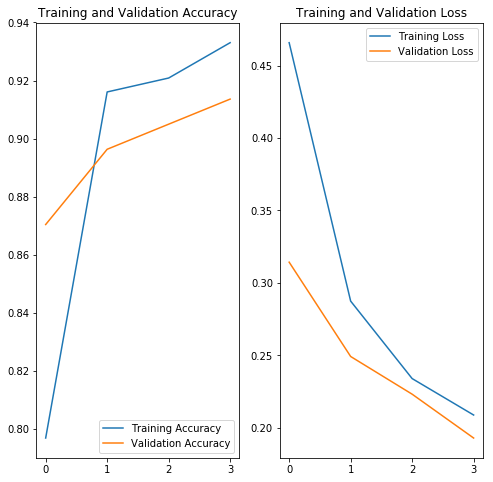

In [11]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Disclaimer: This is not an official Google product. The sample code provided for an educational purpose.

Copyright 2019 Google LLC

Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at http://www.apache.org/licenses/LICENSE-2.0.

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.